In [1]:
import pandas as pd
from functools import reduce
from collections import defaultdict, Counter

def counter_to_df_row(counter, index):
    if bool(counter):
        row = pd.DataFrame.from_dict(counter, orient='index').transpose()
        row.index = [index]
        return row
    else:
        return pd.DataFrame(index=[index])

def get_tags_from(fname):
    with open(fname) as f:
        fnum = int(fname.split('/')[-1].split('.')[0])
        tags = f.read().splitlines()
        categories = Counter([tag.split(':')[0] for tag in tags])
        subcategories = Counter([tag.split(':')[1] for tag in tags])
        
        cat_row = counter_to_df_row(categories, fnum)
        subcat_row = counter_to_df_row(subcategories, fnum)
        
    return cat_row, subcat_row


files = ['./data/tags_train/{}.txt'.format(i) for i in range(10000)]
all_tags = [get_tags_from(file) for file in files]
cats, subcats = tuple(zip(*all_tags))

cats = reduce(lambda x, y: x.append(y), cats)
cats.fillna(0, inplace=True)
cats = cats.sort_index()

subcats = reduce(lambda x, y: x.append(y), subcats)
subcats.fillna(0, inplace=True)
subcats = subcats.sort_index()

In [3]:
files = ['./data/tags_test/{}.txt'.format(i) for i in range(2000)]
all_tags = [get_tags_from(file) for file in files]
cats_test, subcats_test = tuple(zip(*all_tags))

cats_test = reduce(lambda x, y: x.append(y), cats_test)
cats_test.fillna(0, inplace=True)
cats_test = cats_test.sort_index()

subcats_test = reduce(lambda x, y: x.append(y), subcats_test)
subcats_test.fillna(0, inplace=True)
subcats_test = subcats_test.sort_index()

In [19]:
tags = pd.concat([cats, subcats], axis=1)
tags_test = pd.concat([cats_test, subcats_test], axis=1)

In [26]:
test_tag_matrix = np.zeros((2000,92))

files = ['./data/descriptions_test/'+str(i)+'.txt' for i in range(2000)]
for fname in files:
    fnum = int(fname.split('/')[-1].split('.')[0])
    with open(fname,'r') as f:
        text = f.read()
        test_tag_matrix[fnum,:] = np.array([tag in text for tag in tags.columns]).astype(int)

test_desc_tags = pd.DataFrame(test_tag_matrix, columns=tags.columns)

In [213]:
from sklearn.metrics.pairwise import cosine_similarity
results = dict()

similarity = cosine_similarity(test_desc_tags, tags_test)

for group, values in pd.DataFrame(similarity).iterrows():
    top_20 = [str(num) for num in list(values.nlargest(20).index)]
    results[str(group)+'.txt'] = '.jpg '.join(top_20) + '.jpg'

results = pd.DataFrame.from_dict(results, orient='index').reset_index()
results.columns = ['Descritpion_ID','Top_20_Image_IDs']
results.to_csv('new_submission.csv', index=False,index_label=False)

In [218]:
!cat ./data/descriptions_test/1.txt

A large slice of angel food cake sitting on top of a plate.
A small plate contains a large slice of cake. 
A quarter of a cake on a plate
A large piece of yellow cake sits on a plate.
A large slab of sponge cake sits upon a flowery plate.


In [214]:
results.head()

,Descritpion_ID,Top_20_Image_IDs
0,0.txt,250.jpg 281.jpg 311.jpg 381.jpg 388.jpg 1086.j...
1,1.txt,1156.jpg 1341.jpg 1529.jpg 238.jpg 435.jpg 542...
2,2.txt,598.jpg 43.jpg 97.jpg 184.jpg 228.jpg 229.jpg ...
3,3.txt,66.jpg 90.jpg 417.jpg 686.jpg 1220.jpg 1932.jp...
4,4.txt,338.jpg 934.jpg 15.jpg 19.jpg 111.jpg 120.jpg ...


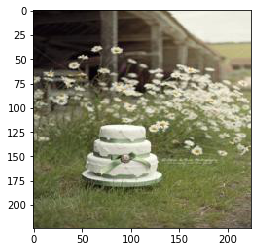

In [219]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img=mpimg.imread('./data/images_test/1156.jpg')
imgplot=plt.imshow(img)

In [204]:
list(tags_test.iloc[598][tags_test.iloc[598] !=0 ].index)

['outdoor', 'vehicle', 'airplane', 'traffic light']